In [1]:
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
from pocket_coffea.parameters import defaults

from hist import Hist

import sys


matplotlib.rcParams["figure.dpi"] = 300


/work/mmalucch/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
prefix =  str(
    os.environ.get("HH", "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b/")
)
prefix='/work/mmalucch/out_hh4b/'

input = prefix + "hh4b_btag_in_presel/output_all.coffea"
o = load(f"{input}")
col = o["columns"]["GluGlutoHHto4B"][
    "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018"
]["baseline"]
print(o["cutflow"])
for k in col.keys():
    col[k] = col[k].value#[col[k].value != -999]

{'initial': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018': 1591}, 'skim': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018': 614}, 'presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018': 130}, 'baseline': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018': {'GluGlutoHHto4B': 130}}}


In [3]:
print(col.keys())
for k in col.keys():
    print(k, col[k].shape)


dict_keys(['weight', 'bQuarkHiggsMatched_N', 'bQuarkHiggsMatched_provenance', 'bQuarkHiggsMatched_pdgId', 'bQuarkHiggsMatched_dRMatchedJet', 'bQuarkHiggsMatched_genPartIdxMother', 'bQuarkHiggsMatched_pt', 'bQuarkHiggsMatched_eta', 'bQuarkHiggsMatched_phi', 'bQuarkHiggsMatched_mass', 'bQuarkMatched_N', 'bQuarkMatched_provenance', 'bQuarkMatched_pdgId', 'bQuarkMatched_dRMatchedJet', 'bQuarkMatched_genPartIdxMother', 'bQuarkMatched_pt', 'bQuarkMatched_eta', 'bQuarkMatched_phi', 'bQuarkMatched_mass', 'bQuark_N', 'bQuark_provenance', 'bQuark_pdgId', 'bQuark_genPartIdxMother', 'bQuark_pt', 'bQuark_eta', 'bQuark_phi', 'bQuark_mass', 'JetGoodHiggsMatched_N', 'JetGoodHiggsMatched_provenance', 'JetGoodHiggsMatched_pdgId', 'JetGoodHiggsMatched_dRMatchedJet', 'JetGoodHiggsMatched_pt', 'JetGoodHiggsMatched_eta', 'JetGoodHiggsMatched_phi', 'JetGoodHiggsMatched_mass', 'JetGoodHiggsMatched_btagPNetB', 'JetGoodHiggsMatched_ptPnetRegNeutrino', 'JetGoodHiggsMatched_hadronFlavour', 'JetGoodMatched_N', 'Je

1) bQuark -> all b-quark (4 quark per event)
2) bQuark matched -> b-quark matched with jet-good (4quark/events), when there’s no matching a padding is present in the array
3) bQuark matched Higgs ->  b-quark matched with jet-good Higgs
4) Jet good -> all jets passing pre-selection (irregular array of at least for jets per event since we require N_jet_good>=4 in the event preselection)
5) Jet good Higgs -> similar as 4) but only 4 leading jets in b-tag (i.e. as in the analysis selection)
6) Jet good matched -> similar as 4) but with parton matching switched on ( when there’s no matching a padding is present in the array)
7) Jet good matched Higgs -> similar as 6) but only 4 leading jets in b-tag  (i.e. as in the analysis selection)

In [4]:
print(len(col["JetGoodMatched_provenance"]))
print(ak.sum(col["JetGoodMatched_N"]))
print(len(col["JetGoodMatched_N"]))


jet_good_matched_provenance_unflat = ak.unflatten(
    col["JetGoodMatched_provenance"], col["JetGoodMatched_N"]
)
jet_good_matched_provenance_unflat_5jets=jet_good_matched_provenance_unflat[col["JetGoodMatched_N"]>=5]


525
525
130


In [5]:
print(ak.sum(col["JetGoodHiggsMatched_N"]))
print(ak.sum(col["JetGoodMatched_N"]))
print(ak.sum(col["JetGood_N"]))
print((col["JetGoodMatched_provenance"][:6]))

520
525
525
[1. 2. 2. 1. 2. 1.]


[[1, 2, 2, 1], [2, 1, 1, 2], [2, 1, 2, 1, ... 2, 2, 1], [1, 1, 2, 2], [1, 1, 2, 2]]
5
0.2
0.007692307692307693
[[1, 2, -999, 2, 1]]
[[0.999, 0.999, -999, 0.915, 0.514]]
[[0.999, 0.999, 0.996, 0.915, 0.514]]
[0.514]


<Array [[0.999, 0.993, ... 0.673, 0.645]] type='130 * var * float64'>

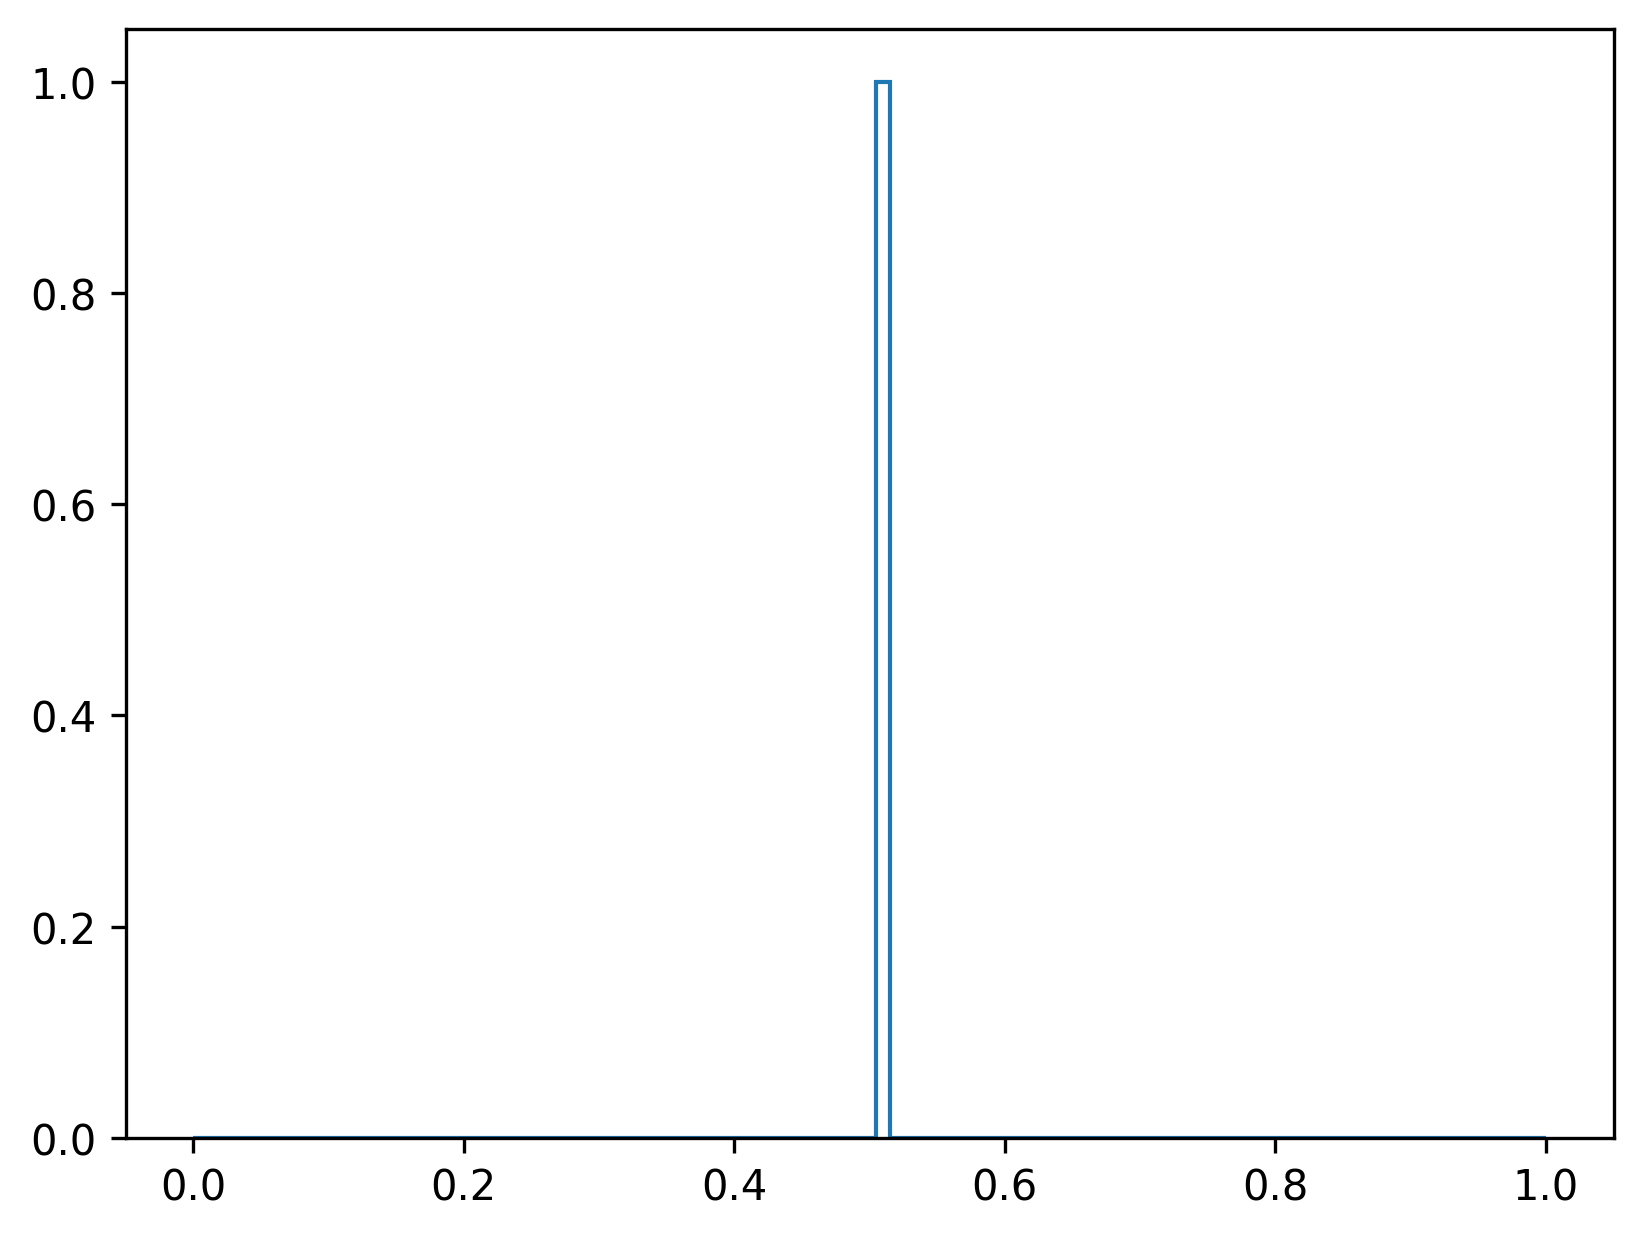

In [8]:
jet_good_matched_provenance_unflat = ak.unflatten(
    col["JetGoodMatched_provenance"], col["JetGoodMatched_N"]
)
print(jet_good_matched_provenance_unflat)
five_jets = col["JetGoodMatched_N"]>=5
print(ak.sum(five_jets))
mask_5_matched =jet_good_matched_provenance_unflat[five_jets][:,4] != -999.
print(ak.sum(mask_5_matched)/ak.sum(five_jets))
print(ak.sum(mask_5_matched)/len(col["JetGoodMatched_N"]))
print(jet_good_matched_provenance_unflat[five_jets][mask_5_matched])


jet_good_matched_btag_unflat=ak.unflatten(col["JetGoodMatched_btagPNetB"], col["JetGoodMatched_N"])
jet_good_btag_unflat=ak.unflatten(col["JetGood_btagPNetB"], col["JetGoodMatched_N"])
print(jet_good_matched_btag_unflat[five_jets][mask_5_matched])
print(jet_good_btag_unflat[five_jets][mask_5_matched])
plt.hist(jet_good_matched_btag_unflat[five_jets][mask_5_matched][:,4], bins=np.linspace(0,1,100), histtype="step", label="matched")

print(jet_good_matched_btag_unflat[five_jets][mask_5_matched][:,4])
jet_good_matched_btag_unflat

In [7]:
a=ak.Array([[1, None], [1, None]])
print(ak.count(a, axis=1))
print(ak.num(a))

[1, 1]
[2, 2]
